In [1]:
# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical,load_img,img_to_array
from keras.backend import categorical_crossentropy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.applications.mobilenet import MobileNet, preprocess_input
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback

# CONFIG

In [3]:
class cfg:
    target_size=(300,300)
    file = '../input/cassava123/Cassava_disease'
    n_classes=5
    input_shape=(300,300,3)
    epochs=80
    verbose=1 #hiển thị quá trình train
    batch_size=16

# DATA PREPROCESSING
Add augmentation method and split data into train/validation 


In [4]:
train_generator = ImageDataGenerator(rescale=1./255,
                               validation_split=0.2,
                               rotation_range=20,
                               width_shift_range=0.25,
                               height_shift_range=0.25,    
                               shear_range=0.25,
                               zoom_range=0.25)
validation_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.2,
                                    rotation_range=20,
                                    width_shift_range=0.25,
                                    height_shift_range=0.25,    
                                    shear_range=0.25,
                                    zoom_range=0.25)

train_dataset=train_generator.flow_from_directory(cfg.file,
                                     target_size=cfg.target_size,
                                     batch_size=16,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True)
validation_dataset=validation_generator.flow_from_directory(cfg.file,
                                              target_size=cfg.target_size,
                                              batch_size=16,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=False)

Found 1287 images belonging to 5 classes.
Found 319 images belonging to 5 classes.


# This function is used to init model and compile model

In [5]:
  def build_model():
        model = Sequential()
        model.add(Conv2D(32, (3, 3), input_shape=(300,300,3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # the model so far outputs 3D feature maps (height, width, features)

        model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
        model.add(Dense(1280))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        model.add(Dense(5))
        model.add(Activation('softmax'))

        model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
        return model

In [6]:
#Init model
model=build_model()

2022-06-23 12:16:59.532258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 12:16:59.629858: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 12:16:59.630650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 12:16:59.632009: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

# TRAINING

In [7]:
# model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) #categorical_crossentropy
history=model.fit(train_dataset, batch_size=16, epochs=80, verbose=1,
                  validation_data=validation_dataset)#, callbacks=[lr_callbacks]

2022-06-23 12:17:02.492756: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/80


2022-06-23 12:17:04.864218: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


81/81 [==============================] - 48s 491ms/step - loss: 1.6173 - accuracy: 0.2222 - val_loss: 1.5551 - val_accuracy: 0.3009
Epoch 2/80
81/81 [==============================] - 30s 375ms/step - loss: 1.5023 - accuracy: 0.3155 - val_loss: 1.5754 - val_accuracy: 0.2759
Epoch 3/80
81/81 [==============================] - 31s 380ms/step - loss: 1.4359 - accuracy: 0.3388 - val_loss: 1.6816 - val_accuracy: 0.3511
Epoch 4/80
81/81 [==============================] - 31s 380ms/step - loss: 1.3609 - accuracy: 0.4033 - val_loss: 1.3490 - val_accuracy: 0.4075
Epoch 5/80
81/81 [==============================] - 31s 386ms/step - loss: 1.3430 - accuracy: 0.4305 - val_loss: 1.4529 - val_accuracy: 0.3229
Epoch 6/80
81/81 [==============================] - 30s 376ms/step - loss: 1.3159 - accuracy: 0.4382 - val_loss: 1.3933 - val_accuracy: 0.4138
Epoch 7/80
81/81 [==============================] - 30s 372ms/step - loss: 1.2622 - accuracy: 0.4670 - val_loss: 1.3021 - val_accuracy: 0.3981
Epoch 8/80

# PLOT TRAINING AND TESTING HISTORY

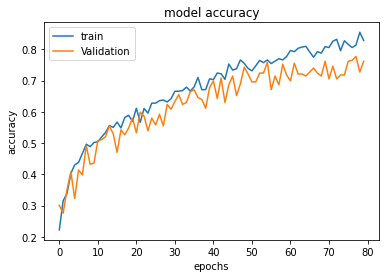

In [8]:
epochs = 50
# Draw plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

# plt.figure(2,figsize=(7,5))
# plt.plot(xc,train_acc)
# plt.plot(xc,val_acc)
# plt.xlabel('num of Epochs')
# plt.ylabel('accuracy')
# plt.title('train_acc vs val_acc')
# plt.grid(True)
# plt.legend(['train','val'],loc=4)
# #print plt.style.available # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])

# SAVE MODEL

In [9]:
from keras.models import load_model

model.save('model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')

# INFERENCE

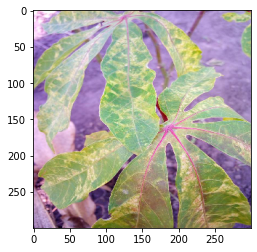

Cassava Green Mottle (CGM)


In [10]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
filename = "../input/cassava-leaf-disease-classification/train_images/1043184548.jpg"

img = load_img(filename,target_size=(300,300))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,300,300,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Cassava Bacterial Blight (CBB)")
if(kq==1):
    print("Cassava Brown Streak Disease (CBSD)")
if(kq==2):
    print("Cassava Green Mottle (CGM)")
if(kq==3):
    print("Cassava Mosaic Disease (CMD)")
if(kq==4):
    print("Healthy")